In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_games = pd.read_parquet('./data/steam_games22.parquet')
df_items = pd.read_parquet('./data/user_items.parquet')
df_reviews = pd.read_parquet('./data/user_reviews.parquet')


In [3]:
df_items.isnull().sum()

user_id                 0
items_count             0
item_id             16806
item_name           16806
playtime_forever    16806
playtime_2weeks     16806
dtype: int64

In [4]:
df_games.isnull().sum()

app_name                     0
price                        0
item_id                      0
developer                    0
release_year                 0
Accounting                   0
Action                       0
Adventure                    0
Animation &amp; Modeling     0
Audio Production             0
Casual                       0
Design &amp; Illustration    0
Early Access                 0
Education                    0
Free to Play                 0
Indie                        0
Massively Multiplayer        0
Photo Editing                0
RPG                          0
Racing                       0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Web Publishing               0
dtype: int64

In [5]:
df_reviews.isnull().sum()

user_id               0
item_id               0
helpful               0
recommend             0
sentiment_analysis    0
posted_year           0
dtype: int64

In [6]:
df_reviews.head(1)

,user_id,item_id,helpful,recommend,sentiment_analysis,posted_year
0,76561197970982479,1250,No ratings yet,True,2,2011


In [7]:
games_reviews= pd.merge(df_games, df_reviews, on='item_id')

In [8]:
df_items.head(1)

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10.0,Counter-Strike,6.0,0.0


### Análisis de juegos

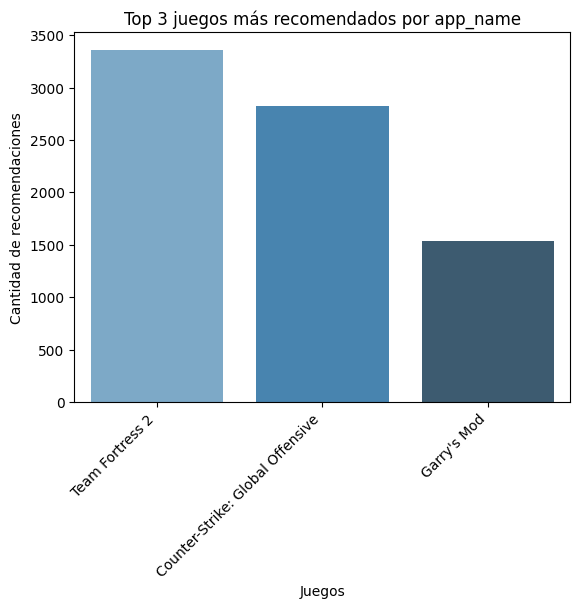

In [10]:
# Filtramos solo las filas con recommend=True
df_reviews_true = games_reviews[games_reviews['recommend']==True]

# Contamos la cantidad de recomendaciones por item_id
recomendaciones_por_item = df_reviews_true.groupby('item_id')['recommend'].count().reset_index()

# Ordenamos en orden descendente
recomendaciones_por_item = recomendaciones_por_item.sort_values(by='recommend', ascending=False)

# Tomamos los 3 primeros ítems
top_3_recomendados = recomendaciones_por_item.head(3)

# Combinamos con df_steam para obtener los nombres de los ítems
top_3_mas_recomendados = pd.merge(top_3_recomendados, df_games[['item_id', 'app_name']], left_on='item_id', right_on='item_id', how='left')

# Creamos un gráfico de barras utilizando Seaborn
ax = sns.barplot(x='app_name', y='recommend', data=top_3_mas_recomendados, palette='Blues_d')

# Agregamos etiquetas al gráfico
plt.xlabel('Juegos')
plt.ylabel('Cantidad de recomendaciones')
plt.title('Top 3 juegos más recomendados por app_name')

# Rotamos las etiquetas del eje x para que sean legibles
# Rotamos las etiquetas del eje x para que sean legibles
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos el gráfico
plt.show()

In [18]:
df_items.head(1)

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10.0,Counter-Strike,6.0,0.0


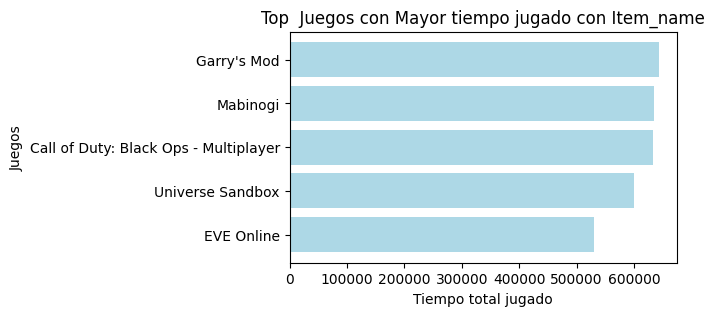

In [12]:
top_juegos_jugados = df_items.sort_values(by='playtime_forever', ascending=False).head(7)
plt.figure(figsize=(5, 3))  # Ajusta el tamaño del gráfico..
# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='lightblue')
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje X
plt.ylabel('Juegos')         # Etiqueta del eje Y
plt.title('Top  Juegos con Mayor tiempo jugado con Item_name')  # Título del gráfico

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.
plt.show() 

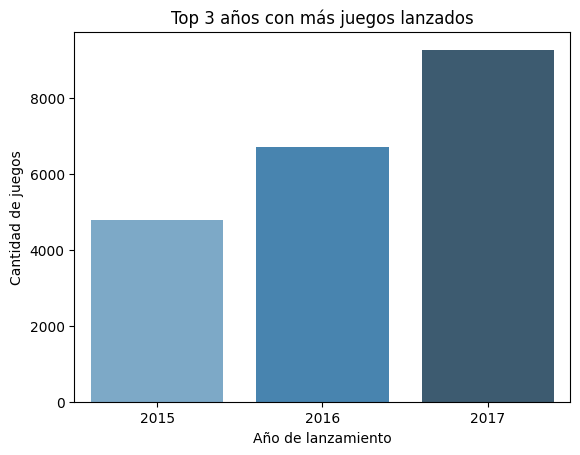

In [15]:
#Veremos en que año se lanzan mas juegos 
# Copia el DataFrame original 
df_steam_copia = df_games.copy()
# Realiza el cálculo de la cantidad de juegos lanzados por año y devolvemos los 3 mas altos
cantidad_juegos_por_año = df_steam_copia.groupby('release_year').size().sort_values(ascending=False).head(3)

# Crea un gráfico de barras utilizando Seaborn
sns.barplot(x=cantidad_juegos_por_año.index, y=cantidad_juegos_por_año.values,palette='Blues_d')

plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Top 3 años con más juegos lanzados')


plt.show()

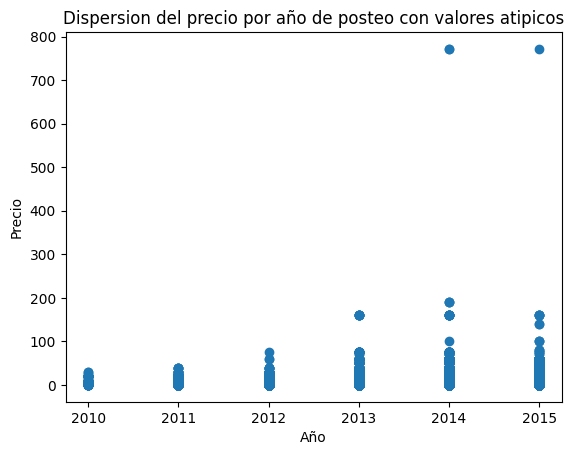

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(games_reviews['posted_year'], games_reviews['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año de posteo con valores atipicos')
plt.show()

- podemos ver que hay valores atipicos en el precio,llegando casi a los 800 dólares

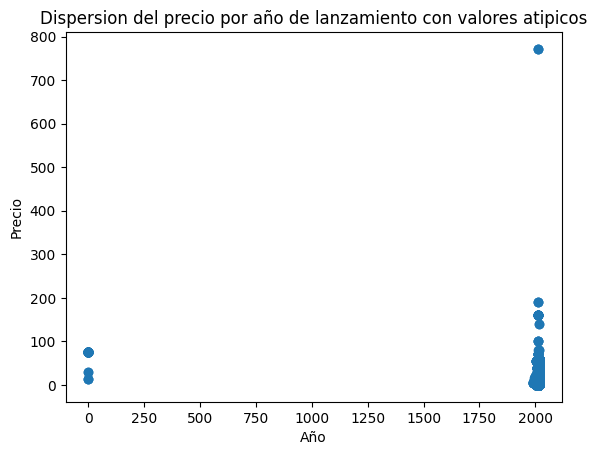

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(games_reviews['release_year'], games_reviews['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año de lanzamiento con valores atipicos')
plt.show()

In [18]:
genres_list= games_reviews.columns
genres_list

Index(['app_name', 'price', 'item_id', 'developer', 'release_year',
       'Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'user_id', 'helpful', 'recommend',
       'sentiment_analysis', 'posted_year'],
      dtype='object')

In [19]:
genres_list= ['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing']

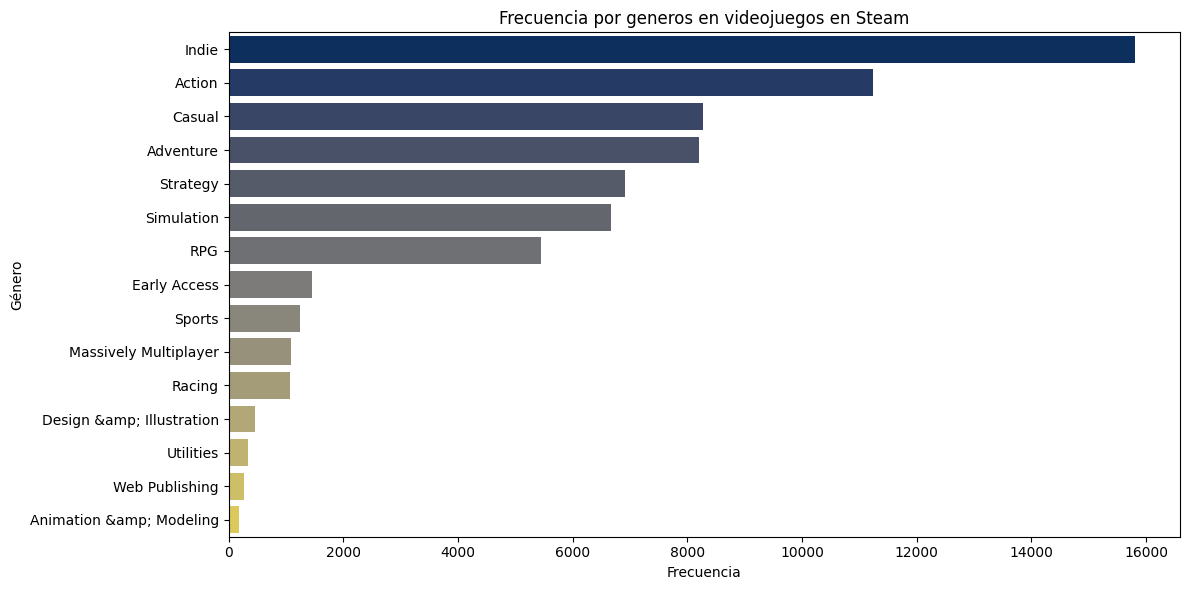

In [23]:
def Conteo(df, lista):
    counter_aux_list = {}
    for i in lista:
        counter_aux_list[i] = df[i].value_counts()[1]
    return counter_aux_list


counter_aux_list_2 = Conteo(df_games, genres_list)
datos = counter_aux_list_2
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frecuencia'])
datos = datos.sort_values(by='Frecuencia', ascending=False).head(15)
# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=datos.index, data=datos, palette='cividis')


# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia por generos en videojuegos en Steam')

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [51]:
datos

,Frecuencia
Indie,15801
Action,11238
Casual,8266
Adventure,8199
Strategy,6919
Simulation,6675
RPG,5452
Early Access,1457
Sports,1254
Massively Multiplayer,1096


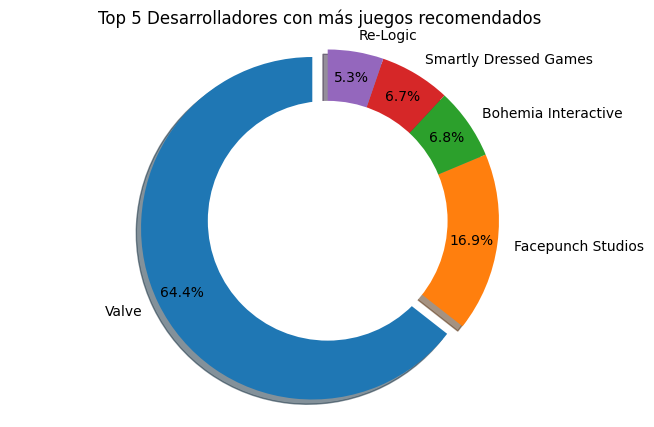

In [27]:
# Agrupamos los juegos por desarrollador y filtramos los juegos recomendados
juegos_por_desarrollador = games_reviews.loc[games_reviews['recommend'] == True].groupby('developer')['developer'].count().nlargest(5)

# Creamos una lista de valores de explosión para resaltar el sector del gráfico correspondiente al desarrollador con la mayor cantidad de juegos recomendados
explode = [0.1 if i == juegos_por_desarrollador.max() else 0 for i in juegos_por_desarrollador]

# Creamos un gráfico de dona utilizando Matplotlib y establecemos los valores de explosión y shadow
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(juegos_por_desarrollador, labels=juegos_por_desarrollador.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, shadow=True)
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Agregamos un título al gráfico
plt.title('Top 5 Desarrolladores con más juegos recomendados')

# Mostramos el gráfico
plt.show()

In [ ]:
#usuaros con mas tiempo jugado